In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec

df=pd.read_csv('../input/datafolder/MyLA311_Service_Request_Data_2019.csv')
print(df.shape)

(1308093, 34)


1. **Brief Overview of Dataset**

In [3]:
df.head(10)

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
0,1-1262692791,01/01/2019 12:02:00 AM,01/04/2019 11:03:00 AM,SR Created,BOS,Bulky Items,Closed,Self Service,Self Service_SAN,NaN,...,"(34.0822581437, -118.312461304)",593.0,H,7.0,Central APC,4.0,David Ryu,119.0,GREATER WILSHIRE NC,OLYMPIC
1,1-1262693531,01/01/2019 12:05:00 AM,01/01/2019 12:09:00 AM,SR Created,LADWP,Report Water Waste,Closed,Mobile App,Self Service,Android,...,"(34.052739298, -118.461184916)",631.0,J,4.0,West Los Angeles APC,11.0,Mike Bonin,NaN,NaN,WEST LOS ANGELES
2,1-1262693571,01/01/2019 12:10:00 AM,01/03/2019 12:27:00 AM,SR Created,OCB,Graffiti Removal,Closed,Self Service,Self Service,NaN,...,"(34.2368883475, -118.53638542)",500.0,J,7.0,North Valley APC,12.0,Mitchell Englander,113.0,NORTHRIDGE WEST,DEVONSHIRE
3,1-1262692831,01/01/2019 12:19:00 AM,01/07/2019 09:43:00 AM,SR Created,BOS,Illegal Dumping Pickup,Closed,Self Service,Self Service,NaN,...,"(34.2302221251, -118.539758291)",530.0,H,1.0,North Valley APC,12.0,Mitchell Englander,124.0,NORTHRIDGE SOUTH NC,DEVONSHIRE
4,1-1262692061,01/01/2019 12:28:00 AM,01/03/2019 12:28:00 AM,SR Created,OCB,Graffiti Removal,Closed,Self Service,Self Service,NaN,...,"(34.2350781243, -118.536391683)",500.0,J,7.0,North Valley APC,12.0,Mitchell Englander,124.0,NORTHRIDGE SOUTH NC,DEVONSHIRE
5,1-1262694421,01/01/2019 12:32:00 AM,01/03/2019 04:27:00 PM,SR Created,OCB,Graffiti Removal,Closed,Self Service,Self Service,NaN,...,"(34.2397037866, -118.523064396)",501.0,A,6.0,North Valley APC,12.0,Mitchell Englander,120.0,NORTHRIDGE EAST,DEVONSHIRE
6,1-1262693641,01/01/2019 12:37:00 AM,04/10/2019 02:37:00 PM,SR Created,OCB,Graffiti Removal,Closed,Mobile App,Self Service,iOS,...,"(34.0406671891, -118.210008014)",635.0,A,5.0,East Los Angeles APC,14.0,Jose Huizar,50.0,BOYLE HEIGHTS NC,HOLLENBECK
7,1-1262692881,01/01/2019 12:40:00 AM,01/08/2019 04:00:00 PM,SR Created,BSL,Single Streetlight Issue,Closed,Self Service,Self Service,NaN,...,"(34.24265647, -118.555125809999)",500.0,F,6.0,North Valley APC,12.0,Mitchell Englander,113.0,NORTHRIDGE WEST,DEVONSHIRE
8,1-1262693661,01/01/2019 12:49:00 AM,01/03/2019 04:29:00 PM,SR Created,OCB,Graffiti Removal,Cancelled,Self Service,Self Service,NaN,...,"(34.2574373984, -118.524448794)",501.0,A,4.0,North Valley APC,12.0,Mitchell Englander,118.0,GRANADA HILLS SOUTH NC,DEVONSHIRE
9,1-1262693701,01/01/2019 12:58:00 AM,04/10/2019 02:22:00 PM,SR Created,OCB,Graffiti Removal,Closed,Mobile App,Self Service,iOS,...,"(34.0623117804, -118.198087563)",635.0,C,2.0,East Los Angeles APC,14.0,Jose Huizar,47.0,LINCOLN HEIGHTS NC,HOLLENBECK


In [4]:
df.columns

Index(['SRNumber', 'CreatedDate', 'UpdatedDate', 'ActionTaken', 'Owner',
       'RequestType', 'Status', 'RequestSource', 'CreatedByUserOrganization',
       'MobileOS', 'Anonymous', 'AssignTo', 'ServiceDate', 'ClosedDate',
       'AddressVerified', 'ApproximateAddress', 'Address', 'HouseNumber',
       'Direction', 'StreetName', 'Suffix', 'ZipCode', 'Latitude', 'Longitude',
       'Location', 'TBMPage', 'TBMColumn', 'TBMRow', 'APC', 'CD', 'CDMember',
       'NC', 'NCName', 'PolicePrecinct'],
      dtype='object')

In [5]:
df.isnull().sum()

SRNumber                          0
CreatedDate                       0
UpdatedDate                       0
ActionTaken                       0
Owner                             0
RequestType                       0
Status                            0
RequestSource                     0
CreatedByUserOrganization         0
MobileOS                     987350
Anonymous                         0
AssignTo                      19666
ServiceDate                   78810
ClosedDate                     9260
AddressVerified                   0
ApproximateAddress           381401
Address                          78
HouseNumber                  248956
Direction                    101473
StreetName                   248955
Suffix                       118332
ZipCode                        1776
Latitude                       1330
Longitude                      1330
Location                       1330
TBMPage                        1339
TBMColumn                      1339
TBMRow                      

In [6]:
# Check for feature correlation

df.corr()

,HouseNumber,ZipCode,Latitude,Longitude,TBMPage,TBMRow,CD,NC
HouseNumber,1.000000,0.688065,0.597352,-0.676906,-0.569370,-0.042036,-0.202450,-0.303622
ZipCode,0.688065,1.000000,0.454896,-0.501505,-0.445144,-0.011660,-0.251038,-0.307189
Latitude,0.597352,0.454896,1.000000,-0.567839,-0.961318,-0.092659,-0.429946,-0.541700
Longitude,-0.676906,-0.501505,-0.567839,1.000000,0.549999,0.012689,0.292725,0.264410
TBMPage,-0.569370,-0.445144,-0.961318,0.549999,1.000000,-0.026922,0.405263,0.540161
TBMRow,-0.042036,-0.011660,-0.092659,0.012689,-0.026922,1.000000,0.145874,0.000878
CD,-0.202450,-0.251038,-0.429946,0.292725,0.405263,0.145874,1.000000,0.323270
NC,-0.303622,-0.307189,-0.541700,0.264410,0.540161,0.000878,0.323270,1.000000


**2. Some Simple Data Cleaning Steps**

In [7]:
# Fill in some NAN values 

temp1 = ['MobileOS', 'ApproximateAddress', 'Direction', 'Suffix', 'TBMColumn', 'APC', 'CDMember', 'PolicePrecinct']
temp2 = ['TBMRow', 'CD']
for col in temp1:
    df[col].fillna('nan_value', inplace=True)
    df[col] = df[col].astype('object')
for col in temp2:
    df[col].fillna(999.0, inplace=True)
    df[col] = df[col].astype('int16')

In [8]:
# Feature mapping for RequestSource

df['RequestSource'] = (df['RequestSource'].map({
"Web Form": "Others",                           
"Walk-in": "Others",                         
"Voicemail": "Others",                  
"Twitter": "Others",                         
"TTY/ NexTalk": "Others",                      
"Self Service": "Self Service",               
"Radio": "Others",                               
"Queue Initiated Customer Call": "Others",      
"Mobile App": "Mobile App",                      
"Mayor's Office": "Others",                     
"Letter": "Others",                           
"Fax": "Others",                               
"Email": "Email",                            
"Driver Self Report": "Driver Self Report",         
"Council's Office": "Others",
"City Attorney": "Others",                   
"Call": "Call"                        
})).astype('object')

In [9]:
# Feature mapping for CreatedByUserOrganization

df['CreatedByUserOrganization'] = (df['CreatedByUserOrganization'].map({
"Self Service_SAN": "Self Service_SAN",
"Self Service": "Self Service",
"Proactive Insert": "Proactive Insert",
"OCB": "OCB",
"LAAS": "Self Service",
"ITA": "ITA",
"FIMS": "Self Service",
"Council's Office": "Council's Office",
"BSS": "BSS",
"BSL": "BSL",
"BOS Franchise": "BOS Franchise", 
"BOS": "BOS"
})).astype('object')

In [10]:
# Feature mapping for Direction

df['Direction'] = (df['Direction'].map({
'nan_value': 'nan_value',
'W': 'W',
'SOUTH': 'S',
'S': 'S',
'R': 'nan_value',
'NORTH': 'N',
'N': 'N',
'E': 'E'
})).astype('object')

In [11]:
# Feature mapping for TBMColumn

df['TBMColumn'] = (df['TBMColumn'].map({
'nan_value': 'nan_value',
'J': 'J',
'I': 'nan_value',        
'H': 'H',            
'G': 'G',      
'F': 'F',     
'E': 'E',           
'D': 'D',     
'C': 'C',      
'B': 'B',       
'A': 'A'     
})).astype('object')

In [12]:
df['Suffix'] = (df['Suffix'].map({
"nan_value": "nan_value",    
"WY": "Way", "WK": "Way", "WAY": "Way", "WALK": "Way",           
"VISTA": "Terrain", "VIS": "Terrain", "VIEW": "Terrain", "TR": "Terrain", "TER": "Terrain", "SQ": "Terrain", "SP": "Terrain", "ROW": "Terrain", 
"ST": "Street",
"ROAD": "Road", "RD": "Road",         
"PZ": "Pkwy", "PT": "Pkwy", "PL": "Pkwy", "PKWY": "Pkwy", "PASS": "Pkwy", "PASEO": "Pkwy", "PARK": "Pkwy", "MALL": "Pkwy",       
"LOOP": "Lane", "LN": "Lane", "LANE": "Lane", "HWY": "Lane", "HILL": "Lane", "GRN": "Lane",         
"DR": "Drive",          
"CYN": "Court", "CT": "Court", "COVE": "Court", "COURT": "Court", "CL": "Court", "CK": "Court", "CIR": "Court",          
"BLVD": "Blvd",        
"AVE": "Ave", "AV": "Ave"        
})).astype('object')

In [13]:
# Create new combined interactive Request features 

df['requestSource_Type'] = df['RequestSource'].astype('str')+'_'+(df['RequestType']).astype('str')
df['requestType_Status'] = df['RequestType'].astype('str')+'_'+(df['Status']).astype('str')

In [14]:
# Convert into DateTime

df['CreatedDate'] = pd.to_datetime(df['CreatedDate'])
#df['Created_dateonly'] = df['CreatedDate'].dt.date
#df['Created_timeonly'] = df['CreatedDate'].dt.time
df['UpdatedDate'] = pd.to_datetime(df['UpdatedDate'])
#df['Updated_dateonly'] = df['UpdatedDate'].dt.date
#df['Updated_timeonly'] = df['UpdatedDate'].dt.time
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
df['ServiceDate'] = pd.to_datetime(df['ServiceDate'])

In [15]:
# More DateTime Analysis

cols = ['CreatedDate', 'UpdatedDate', 'ServiceDate', 'ClosedDate']
for col in cols:
    df[col+'_yearmonth'] = (df[col]).astype('str').str.slice(stop=7)
    df[col+'_monthdate'] = (df[col]).astype('str').str.slice(start=5, stop=10)
    
df['Created_monthonly'] = (df['CreatedDate'].dt.month).astype('int16')
df['Created_weekonly'] = (df['CreatedDate'].dt.week).astype('int16')
df['Created_dowonly'] = (df['CreatedDate'].dt.dayofweek).astype('int16')

In [16]:
# Drop 2 rows 

df_la = df[df['ClosedDate_yearmonth'] != '2109-07']
df_la = df_la[df_la['ClosedDate_yearmonth'] != '2109-04']
print(df.shape, df_la.shape)

(1308093, 47) (1308091, 47)


In [17]:
# this code was borrowed from @rgao and please refer to the following link:
# https://github.com/hackforla/311-data/blob/dev/dataAnalysis/ryanAnalysis.ipynb
def dt_to_days(dt):
    if not pd.isnull(dt):
        num_days = pd.Timedelta.total_seconds(dt)/(24.*3600)
        if num_days <= 0.00:
            return 0
        return pd.Timedelta.total_seconds(dt)/(24.*3600)
    else:
        return np.NaN

df_la['Closed_Created'] = df_la['ClosedDate'] - df_la['CreatedDate']
df_la['Service_Created'] = df_la['ServiceDate'] - df_la['CreatedDate']
df_la['Closed_Service'] = df_la['ClosedDate'] - df_la['ServiceDate']
df_la['Updated_Service'] = df_la['UpdatedDate'] - df_la['ServiceDate']

# Create Days Difference to build relationships among Time Variables/to perform Time Analysis
cols = ['Closed_Created', 'Service_Created', 'Closed_Service', 'Updated_Service']
for col in cols:
    df_la[col+'_days'] = df_la[col].apply(dt_to_days)

df_la.drop(['Closed_Created', 'Service_Created', 'Closed_Service', 'Updated_Service'], axis=1, inplace=True)

In [18]:
# Check if there is any werid values
# 'Closed_Created_days', 'Service_Created_days', 'Closed_Service_days', 'Updated_Service_days'

df_la['Closed_Service_days'].value_counts().sort_index(ascending=False)

704.329861        3
704.326389        1
703.531250        1
703.527778        4
701.569444        3
              ...  
0.000058          1
0.000046          2
0.000023          1
0.000012          1
0.000000      63084
Name: Closed_Service_days, Length: 43873, dtype: int64

**3. Data Visualization with EDA**
 
 We will look at frequency for 
 
['RequestType', 'Status', 'RequestSource', 'Created_dowonly', 'CreatedDate_yearmonth', 'UpdatedDate_yearmonth', 'ServiceDate_yearmonth', 'ClosedDate_yearmonth'] 

**a) Check for Unique Values of Request+Location+Time Categorical Variables**

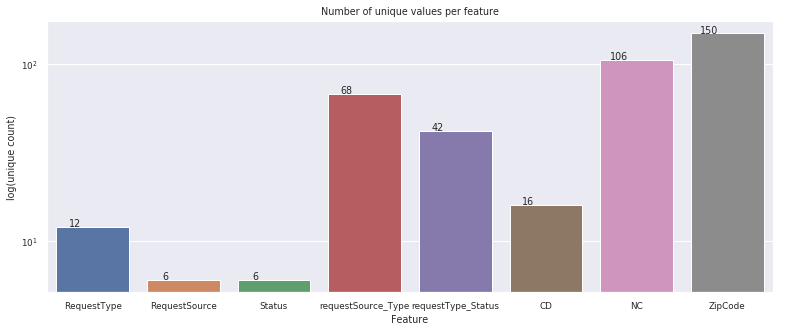

In [19]:
# Check unique values for some Request+Location variables

plt.figure(figsize=(13, 5))
cols = ['RequestType', 'RequestSource', 'Status', 'requestSource_Type', 'requestType_Status', 'CD', 'NC', 'ZipCode']
uniques = [len(df_la[col].unique()) for col in cols]
sns.set(font_scale=0.8)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/4.,
            height + 0.07,
            uniq,
            ha="center") 

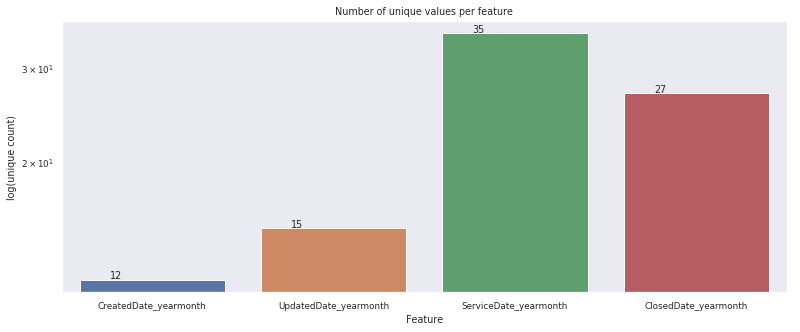

In [20]:
# Check unique values for Time variables

plt.figure(figsize=(13, 5))
cols = ['CreatedDate_yearmonth', 'UpdatedDate_yearmonth', 'ServiceDate_yearmonth', 'ClosedDate_yearmonth']
uniques = [len(df_la[col].unique()) for col in cols]
sns.set(font_scale=0.8)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/4.,
            height + 0.07,
            uniq,
            ha="center") 

**b) Check the Distribution for Days between Request Created and Closed**

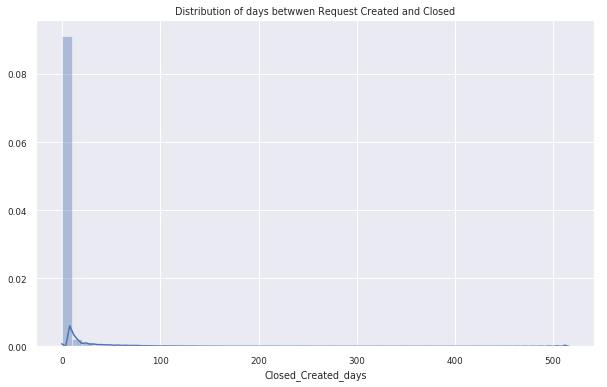

In [21]:
plt.figure(figsize = (10, 6))
sns.distplot(df_la['Closed_Created_days']);
plt.title('Distribution of days betwwen Request Created and Closed');

**c) Check the Distribution for Days between Request Created and Served**

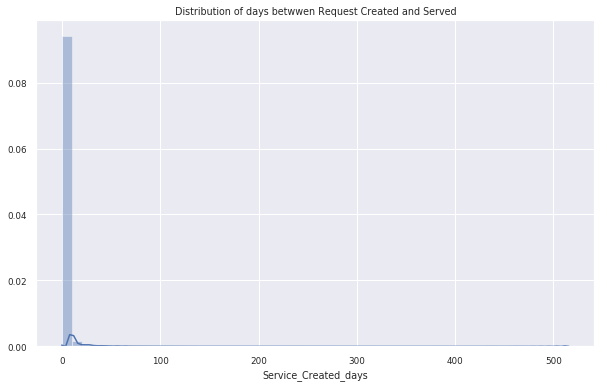

In [22]:
plt.figure(figsize = (10, 6))
sns.distplot(df_la['Service_Created_days']);
plt.title('Distribution of days betwwen Request Created and Served');

**d) Check for Trends & Strange Patterns by Frequency Counting (Request+Location+Time variables)**

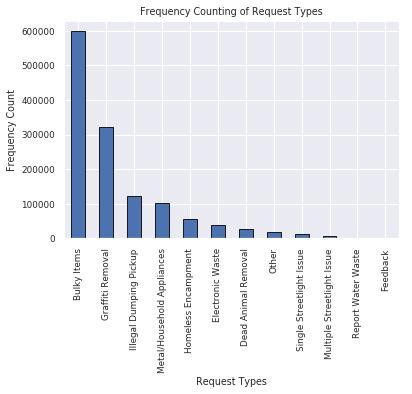

In [23]:
# Frequency Counting for RequestType
df_la['RequestType'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Frequency Counting of Request Types'); plt.xlabel('Request Types'); plt.ylabel('Frequency Count');

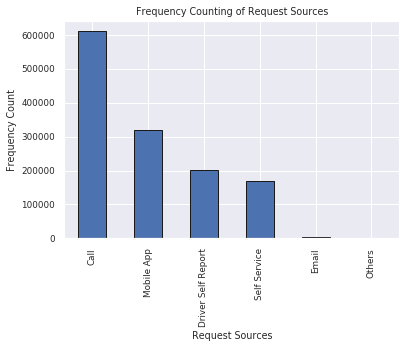

In [24]:
# Frequency Counting for RequestSource
df_la['RequestSource'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Frequency Counting of Request Sources'); plt.xlabel('Request Sources'); plt.ylabel('Frequency Count');

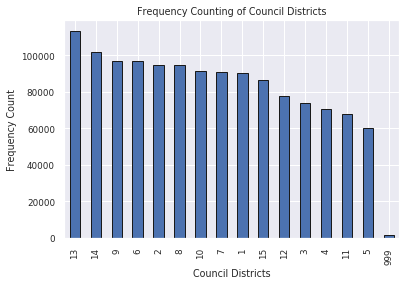

In [25]:
# Frequency Counting for CouncilDistrict (CD)
df_la['CD'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Frequency Counting of Council Districts'); plt.xlabel('Council Districts'); plt.ylabel('Frequency Count');

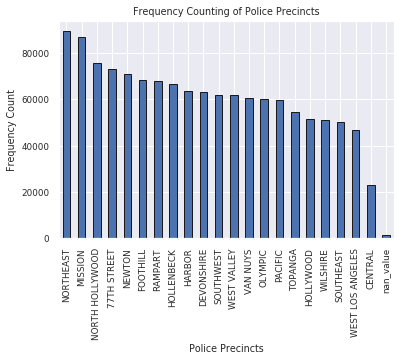

In [26]:
# Frequency Counting for PolicePrecinct
df_la['PolicePrecinct'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Frequency Counting of Police Precincts'); plt.xlabel('Police Precincts'); plt.ylabel('Frequency Count');

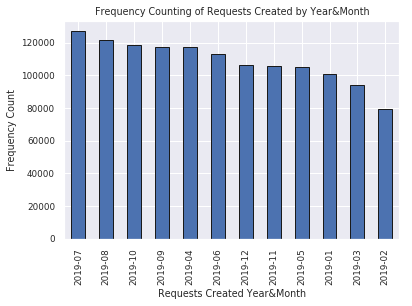

In [27]:
# Frequency Counting for CreatedDate_yearmonth
df_la['CreatedDate_yearmonth'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Frequency Counting of Requests Created by Year&Month'); plt.xlabel('Requests Created Year&Month'); plt.ylabel('Frequency Count');

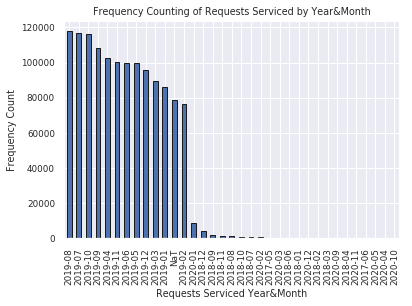

In [28]:
# Frequency Counting for ServiceDate_yearmonth
df_la['ServiceDate_yearmonth'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Frequency Counting of Requests Serviced by Year&Month'); plt.xlabel('Requests Serviced Year&Month'); plt.ylabel('Frequency Count');

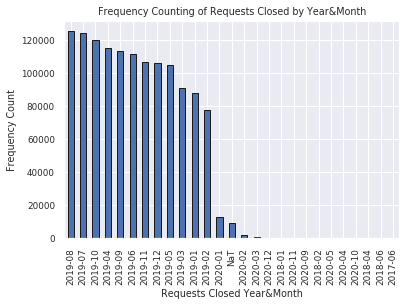

In [29]:
# Frequency Counting for ClosedDate_yearmonth
df_la['ClosedDate_yearmonth'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Frequency Counting of Requests Closed by Year&Month'); plt.xlabel('Requests Closed Year&Month'); plt.ylabel('Frequency Count');

**e) Average Days Taken Vs Location Analysis**

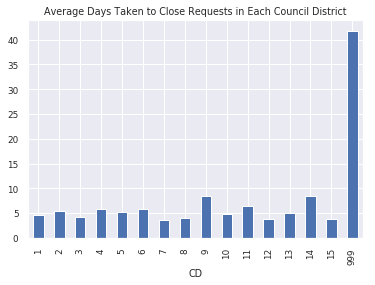

In [30]:
df_la.groupby('CD')['Closed_Created_days'].mean().plot.bar(color = 'b');
plt.title('Average Days Taken to Close Requests in Each Council District');

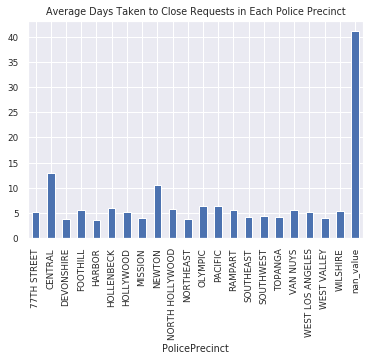

In [31]:
df_la.groupby('PolicePrecinct')['Closed_Created_days'].mean().plot.bar(color = 'b');
plt.title('Average Days Taken to Close Requests in Each Police Precinct');

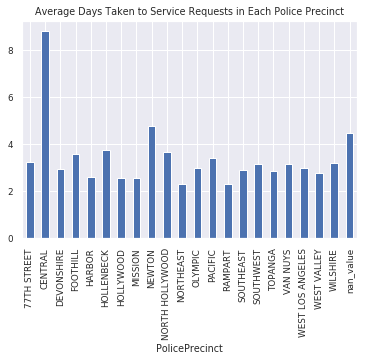

In [32]:
df_la.groupby('PolicePrecinct')['Service_Created_days'].mean().plot.bar(color = 'b');
plt.title('Average Days Taken to Service Requests in Each Police Precinct');

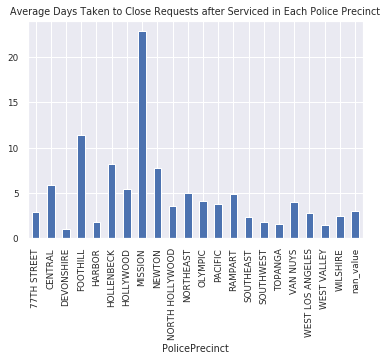

In [33]:
df_la.groupby('PolicePrecinct')['Closed_Service_days'].mean().plot.bar(color = 'b');
plt.title('Average Days Taken to Close Requests after Serviced in Each Police Precinct');

**f) Average Days Taken Vs Request Source/Type Analysis**

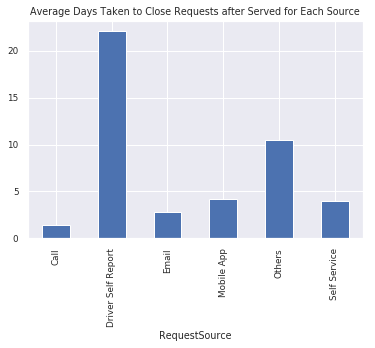

In [34]:
df_la.groupby('RequestSource')['Closed_Service_days'].mean().plot.bar(color = 'b');
plt.title('Average Days Taken to Close Requests after Served for Each Source');

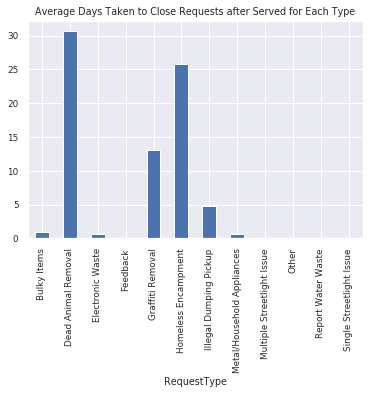

In [35]:
df_la.groupby('RequestType')['Closed_Service_days'].mean().plot.bar(color = 'b');
plt.title('Average Days Taken to Close Requests after Served for Each Type');

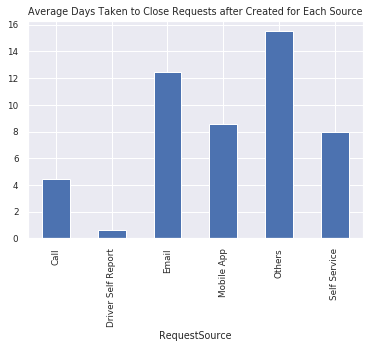

In [36]:
df_la.groupby('RequestSource')['Closed_Created_days'].mean().plot.bar(color = 'b');
plt.title('Average Days Taken to Close Requests after Created for Each Source');

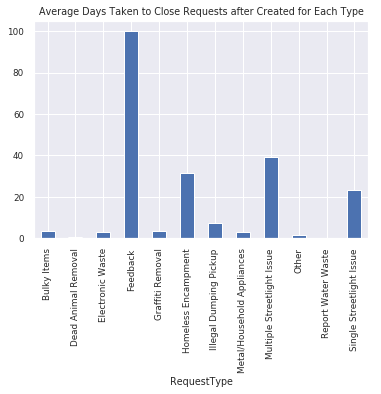

In [37]:
df_la.groupby('RequestType')['Closed_Created_days'].mean().plot.bar(color = 'b');
plt.title('Average Days Taken to Close Requests after Created for Each Type');

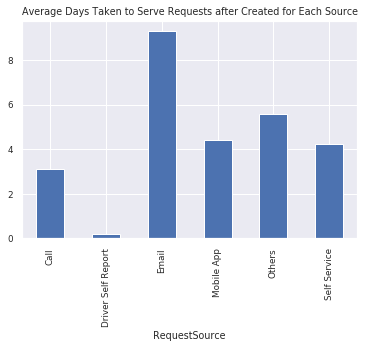

In [38]:
df_la.groupby('RequestSource')['Service_Created_days'].mean().plot.bar(color = 'b');
plt.title('Average Days Taken to Serve Requests after Created for Each Source');

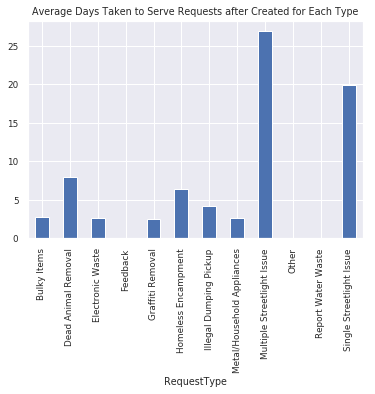

In [39]:
df_la.groupby('RequestType')['Service_Created_days'].mean().plot.bar(color = 'b');
plt.title('Average Days Taken to Serve Requests after Created for Each Type');

**g) Request Status by Each Council District**

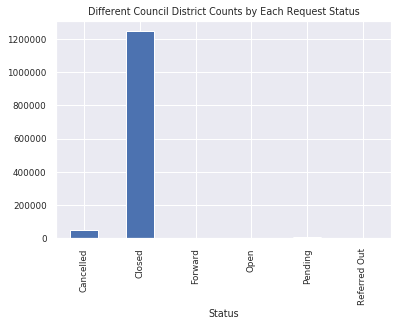

In [40]:
df_la.groupby('Status')['CD'].count().plot.bar(color = 'b');
plt.title('Different Council District Counts by Each Request Status');

**h) Request Type by Each Neighborhood**

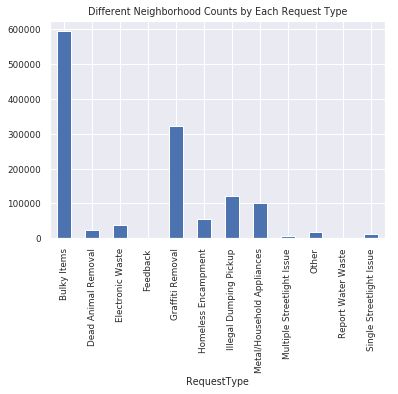

In [41]:
df_la.groupby('RequestType')['NC'].count().plot.bar(color = 'b');
plt.title('Different Neighborhood Counts by Each Request Type');

**4. Request Vs Location Vs Days Difference Feature Relationships**

**a) groupby Request Type**

In [42]:
agg_type = {
    'ZipCode': ['count'],
    'NC': ['count'],
    'Closed_Created_days': ['mean', 'std', 'min', 'max'],
    'Closed_Service_days': ['mean', 'std', 'min', 'max'],
    'Service_Created_days': ['mean', 'std', 'min', 'max'],
    'Updated_Service_days': ['mean', 'std', 'min', 'max']
}
agg_type = df_la.groupby('RequestType').agg(agg_type)
agg_type.columns = ['Type_' + ('_'.join(col).strip()) for col in agg_type.columns.values]
agg_type.reset_index(inplace=True)

In [43]:
agg_type

,RequestType,Type_ZipCode_count,Type_NC_count,Type_Closed_Created_days_mean,Type_Closed_Created_days_std,Type_Closed_Created_days_min,Type_Closed_Created_days_max,Type_Closed_Service_days_mean,Type_Closed_Service_days_std,Type_Closed_Service_days_min,Type_Closed_Service_days_max,Type_Service_Created_days_mean,Type_Service_Created_days_std,Type_Service_Created_days_min,Type_Service_Created_days_max,Type_Updated_Service_days_mean,Type_Updated_Service_days_std,Type_Updated_Service_days_min,Type_Updated_Service_days_max
0,Bulky Items,598523,595006,3.597075,7.236084,0.000000,412.424190,0.945671,6.236874,0.0,377.530556,2.772282,3.404003,0.000000,390.991667,1.035764,6.775334,0.0,377.690972
1,Dead Animal Removal,25423,25263,0.499057,3.441727,0.000694,319.540972,30.636651,86.023551,0.0,318.365972,7.917535,39.147842,0.427083,249.221528,27.686354,81.990701,0.0,318.389583
2,Electronic Waste,38522,38270,3.180702,2.976372,0.000000,223.511806,0.672801,1.676526,0.0,222.379167,2.601840,2.517273,0.000694,93.704167,0.740608,1.708191,0.0,223.079167
3,Feedback,646,645,100.012271,111.850138,0.000694,391.146632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Graffiti Removal,322930,321916,3.589909,12.854292,0.000000,411.526111,13.022087,40.339504,0.0,704.329861,2.496674,11.180877,0.000000,411.526042,13.022306,40.338464,0.0,704.329861
5,Homeless Encampment,55522,55255,31.704379,46.135709,0.000000,403.906944,25.784150,44.061831,0.0,398.368056,6.355699,12.736599,0.001389,396.393056,27.216746,46.033535,0.0,398.368056
6,Illegal Dumping Pickup,122414,121824,7.568641,21.090666,0.000000,391.937130,4.714270,19.195103,0.0,384.355347,4.187865,8.056895,0.000000,392.379861,5.115132,20.366484,0.0,416.922269
7,Metal/Household Appliances,103221,102512,3.219620,3.461069,0.000000,346.949306,0.690035,2.324970,0.0,337.468056,2.633020,2.520485,0.000694,120.189583,0.761339,2.342933,0.0,337.470833
8,Multiple Streetlight Issue,7966,7921,39.311601,58.799619,0.000000,398.840671,0.000000,0.000000,0.0,0.000000,26.893119,48.406401,0.000000,375.157639,10.261251,29.352205,0.0,433.270880
9,Other,17895,17782,1.835016,7.634597,0.000000,385.894792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**b) groupby (Neighborhood + Request Type)**

In [44]:
agg_nctype = {
    'Closed_Created_days': ['mean', 'std', 'min', 'max'],
    'Closed_Service_days': ['mean', 'std', 'min', 'max'],
    'Service_Created_days': ['mean', 'std', 'min', 'max'],
    'Updated_Service_days': ['mean', 'std', 'min', 'max']
}
agg_nctype = df_la.groupby(['NC', 'RequestType']).agg(agg_nctype)
agg_nctype.columns = ['NCType_' + ('_'.join(col).strip()) for col in agg_nctype.columns.values]
agg_nctype.reset_index(inplace=True)

In [45]:
agg_nctype

,NC,RequestType,NCType_Closed_Created_days_mean,NCType_Closed_Created_days_std,NCType_Closed_Created_days_min,NCType_Closed_Created_days_max,NCType_Closed_Service_days_mean,NCType_Closed_Service_days_std,NCType_Closed_Service_days_min,NCType_Closed_Service_days_max,NCType_Service_Created_days_mean,NCType_Service_Created_days_std,NCType_Service_Created_days_min,NCType_Service_Created_days_max,NCType_Updated_Service_days_mean,NCType_Updated_Service_days_std,NCType_Updated_Service_days_min,NCType_Updated_Service_days_max
0,0.0,Bulky Items,3.561103,5.794022,0.000000,145.181250,0.840517,4.488520,0.000000,142.679167,2.889124,3.614265,0.004167,100.491667,0.971050,5.347040,0.000000,142.679167
1,0.0,Dead Animal Removal,0.919039,0.609948,0.037500,2.134722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,Electronic Waste,3.291478,2.456582,0.352778,13.534722,0.669593,0.738685,0.259028,4.678472,2.621885,2.354590,0.012500,13.037500,0.756891,0.844384,0.259028,4.946528
3,0.0,Feedback,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,Graffiti Removal,3.315903,6.326476,0.000000,117.104167,1.698403,4.373243,0.000000,111.719444,2.268404,4.441802,0.000000,31.854861,1.697819,4.372604,0.000000,111.719444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,128.0,Metal/Household Appliances,1.796615,1.599503,0.066667,6.975000,0.384852,0.166386,0.000000,0.681944,1.439084,1.572214,0.059028,6.484722,0.396810,0.175380,0.000000,0.681944
1214,128.0,Multiple Streetlight Issue,54.094711,49.156176,1.077083,107.686736,0.000000,0.000000,0.000000,0.000000,66.836444,46.666729,4.481944,107.686736,2.852496,1.608281,1.493137,4.986111
1215,128.0,Other,0.948775,0.790381,0.012500,3.249306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1216,128.0,Report Water Waste,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**c) groupby Monthly Requests Created**

In [46]:
agg_monthly = {
    'RequestType': ['count'],
    'RequestSource': ['count'],
    'ZipCode': ['count'],
    'NC': ['count']
}
agg_monthly = df_la.groupby(['Created_monthonly']).agg(agg_monthly)
agg_monthly.columns = ['Monthly_' + ('_'.join(col).strip()) for col in agg_monthly.columns.values]
agg_monthly.reset_index(inplace=True)

In [47]:
agg_monthly

,Created_monthonly,Monthly_RequestType_count,Monthly_RequestSource_count,Monthly_ZipCode_count,Monthly_NC_count
0,1,101120,101120,100992,99622
1,2,79554,79554,79469,78456
2,3,94214,94214,94116,92922
3,4,117479,117479,117368,115966
4,5,105155,105155,105083,104785
5,6,113392,113392,113238,112988
6,7,126917,126917,126712,126504
7,8,121428,121428,121121,120903
8,9,117563,117563,117458,117192
9,10,118843,118843,118738,118513


**d) groupby Day of Week Requests Created**

In [48]:
agg_dow = {
    'RequestType': ['count'],
    'RequestSource': ['count'],
    'ZipCode': ['count'],
    'NC': ['count']
}
agg_dow = df_la.groupby(['Created_dowonly']).agg(agg_dow)
agg_dow.columns = ['Dow_' + ('_'.join(col).strip()) for col in agg_dow.columns.values]
agg_dow.reset_index(inplace=True)

In [49]:
agg_dow

,Created_dowonly,Dow_RequestType_count,Dow_RequestSource_count,Dow_ZipCode_count,Dow_NC_count
0,0,256760,256760,256420,254973
1,1,249724,249724,249424,248275
2,2,238135,238135,237844,236459
3,3,200135,200135,199842,198594
4,4,167392,167392,167135,166296
5,5,90903,90903,90756,90406
6,6,105042,105042,104894,104507
